# *demeter* training for the GCAM annual meeting 2025

Authors(s):     Kanishka B. Narayan , Chris R. Vernon

Path to demeter on GitHub: https://github.com/JGCRI/demeter

Path to documentation on demeter: https://jgcri.github.io/demeter/build/html/index.html

Path to example input data used for this tutorial: https://zenodo.org/records/7240315

Welcome to the *demeter* training. This jupyter notebook provides line by line instructions on running demeter and testing the outputs from demeter. Let's start simple by defining our home directory.

In [1]:
import os

# we will use our home directory 
path_to_home = os.path.dirname(os.getcwd())


Next, we can simply import our package

In [2]:
import demeter


## 1: Install the example data


Our example data is stored on a companion archive and will need to be downloaded for use.  _demeter_ offers a convenient function to do this and unzip its contents to a user defined directory.  Let's do that now:

In [ ]:
# this may take a few minutes...so we will comment out the below. Input data is stored in the `example` folder
#demeter.get_package_data(path_to_home)


Now that we have our example data downloaded, let's set the path to the configuration file:

In [ ]:
config_file = os.path.join(path_to_home, 'example/config_gcam_reference.ini')


We will now need to change our path in the configuration file to what we have locally.  We can do this by opening up the `config_gcam_reference.ini` file, modifying the path, and saving the file. 

**Let's do that together now before moving on by assigning the following path to our current working directory to the `run_dir` variable in our configuration file.**

In [ ]:
# execute the following to see your path
os.path.join(path_to_home,"example/")


'/home/7c642dd01dea4367be88bc9cbcfca9bb'

Copy the above and paste it into the `run_dir` of your configuration file, and save it!

**To be safe, we can also run the code below to "programatically" update the path.**

In [ ]:
from configobj import ConfigObj

config = ConfigObj(config_file)
config['STRUCTURE']['run_dir'] = os.path.join(path_to_home,"example/")
config.filename=config_file
config.write()

## 2: Running *demeter* via the configuration file 

*demeter* is controlled via a configuration file which the user can modify. Here we will specify a link to a given configuration file. 

The configuration file points the demeter file to all required variables including (but not limited to) - all regional land outputs, criteria for downscaling, format of outputs, and the resolution of outputs

In [ ]:
%%time

# run all time steps
my_demeter = demeter.run_model(
    config_file=config_file,
    write_outputs=True
)



## 3: Running the model step by step 

*demeter* can also be run for given time steps even allowing the user to step in and out between time steps. In the example below, rather than running for all time steps, we will run first for 2010 and then for 2020

In [ ]:
%%capture
%%time

from demeter import Model 


model = Model(
    config_file=config_file,
    write_outputs=False,
    write_logfile=False
)


# initialize demeter
model.initialize()

demeter_2010 = model.process_step()



Now, let's run for another year and lets print out the data output for a given year

In [10]:
demeter_2015 = model.process_step()
demeter_2015.head()


2024-05-31 21:54:22,066 - demeter_runtime - INFO - Applying intensification: pass 1 for time step 2015...
2024-05-31 21:54:29,174 - demeter_runtime - INFO - Applying expansion for time step 2015...
2024-05-31 21:54:34,465 - demeter_runtime - INFO - Applying intensification: pass 2 for time step 2015...
2024-05-31 21:54:39,443 - demeter_runtime - INFO - Generating projected land cover data for time step 2015...


,latitude,longitude,basin_id,region_id,water,forest,shrub,grass,urban,snow,sparse,crops
0,-55.7916,-67.458378,169.0,26.0,0.7300,0.264900,0.0,0.005100,0.0,0.0,0.0,0.0
1,-55.7916,-67.375045,169.0,26.0,0.4850,0.509913,0.0,0.005087,0.0,0.0,0.0,0.0
2,-55.7916,-67.291712,169.0,26.0,0.3675,0.624937,0.0,0.007563,0.0,0.0,0.0,0.0
3,-55.7916,-67.208378,169.0,26.0,0.6350,0.365000,0.0,0.000000,0.0,0.0,0.0,0.0
4,-55.7916,-67.125045,169.0,26.0,0.8250,0.169965,0.0,0.005035,0.0,0.0,0.0,0.0


## 4: Generating aggregate tabular outputs from our outputs 
Now, we can also re-aggregate the outputs to a convenient csv file  . Be cognizant of the resolution for the re-aggregation!

In [ ]:
from demeter.post_process import post_process_results as proc


# Example on how to run post process results
folder_path = os.path.join(path_to_home, "outputs/*")
output_file = os.path.join(path_to_home, "aggregation_example.csv")

processor = proc.DataProcessor(
    folder_path, 
    resolution=0.5
)

# Process files and save the concatenated DataFrame
processor.process_files()
processor.concatenate_and_save(output_file)


## 5: Making plots from outputs 
We can also make plots for all land types. Note that we can make maps for the world as a whole 

In [ ]:
from demeter import LandCoverPlotter


# Example on how to run plotter
folder_path = os.path.join(path_to_home, "outputs/*")
out_path = path_to_home + "/"  # needs directory delimeter
pft_name = "PFT0"
region_id = 0

plotter = LandCoverPlotter(
    folder_path, 
    pft_name, 
    region_id, 
    out_path
)


We can now view a plot of global forest cover!!

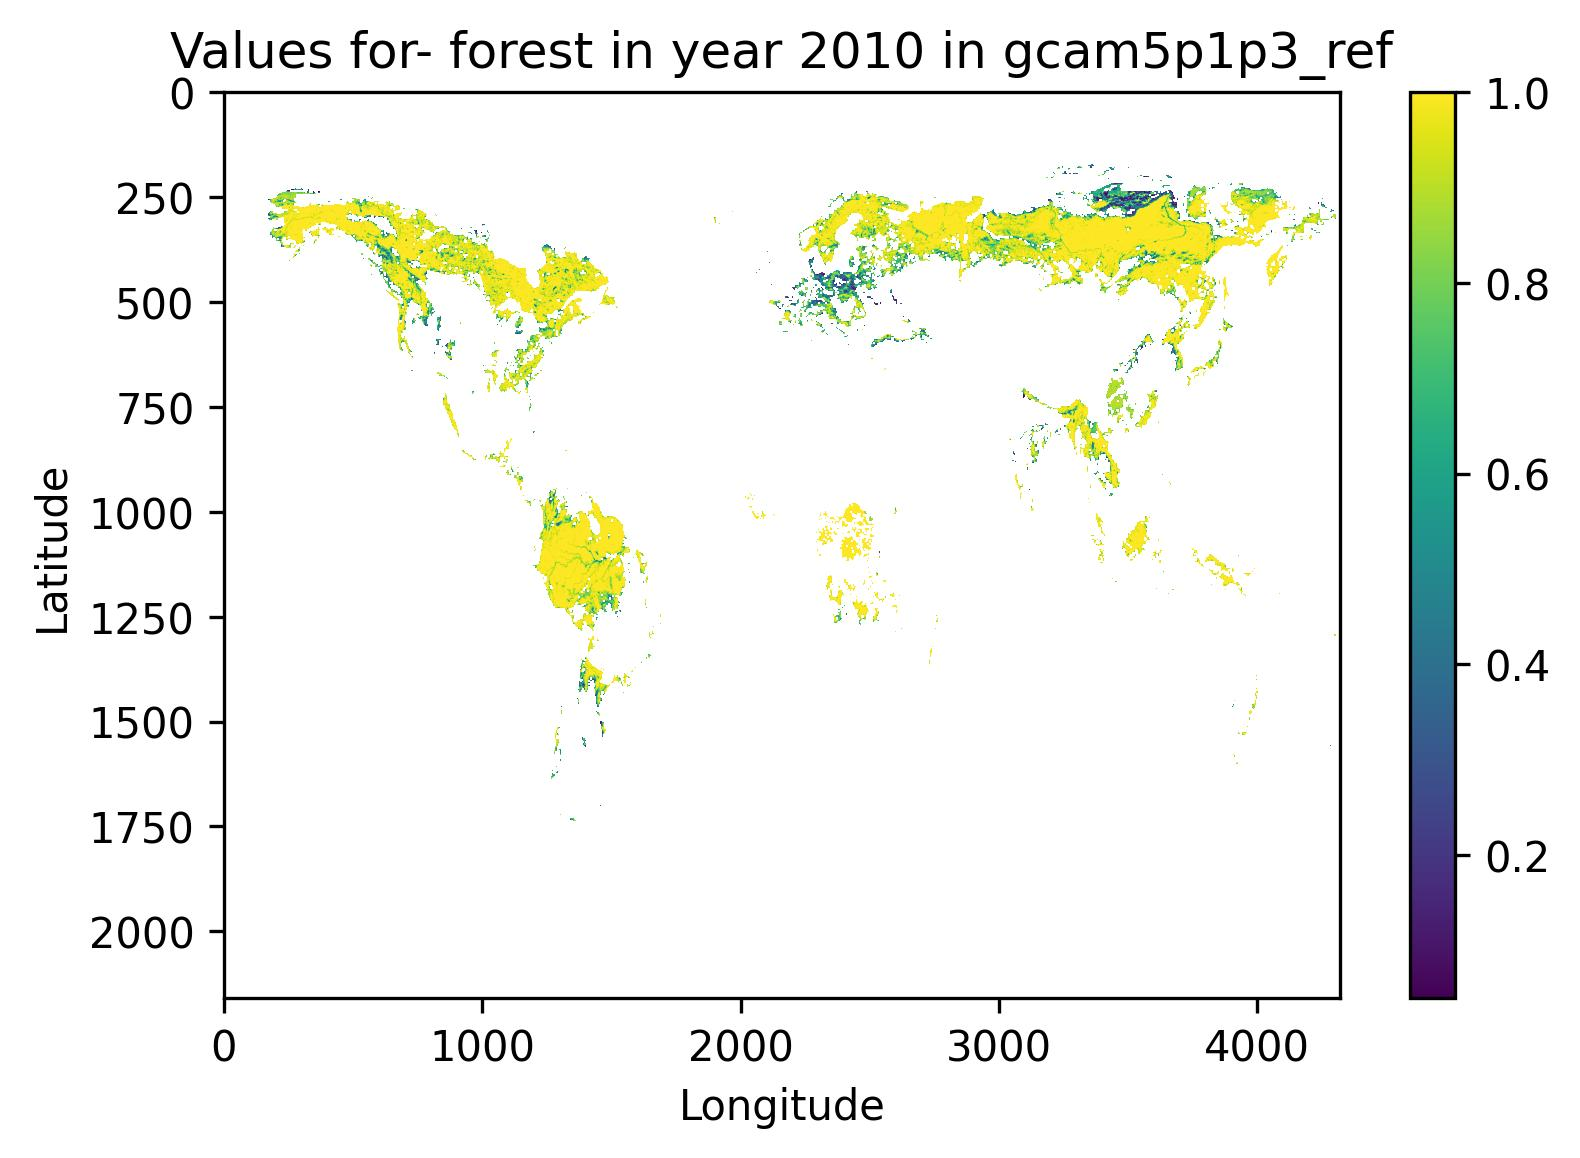

In [13]:
from IPython.display import Image
Image(os.path.join(path_to_home,'forest_gcam5p1p3_ref2010global.jpg'))

## 6. *demeter* beyond GCAM

Note that demeter is capable of being used across several projects with models other than GCAM. For example, we have developed a workflow for demeter that is designed for the Emissions Predictions and Policy Analysis (EPPA) model here- https://zenodo.org/records/10622216 and a version of demeter that is being used by the Basque Center for Climate Change (BC3) to explore alternative land protection scenarios- https://zenodo.org/records/10826464 